<a href="https://colab.research.google.com/github/Puneeth-Abhishek-6622/Speech-Emotion-Recognition-/blob/main/SER_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

import os
os.listdir(file_path)

['Speaker-2',
 'Speaker-8',
 'Speaker-5',
 'Speaker-4',
 'Speaker-3',
 'Speaker-1',
 'Speaker-6',
 'Speaker-7']

#Feature Extraction

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define dataset path
file_path = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

# Emotion mapping
emotion_map = {
    'Anger': 0,
    'Fear': 1,
    'Happy': 2,
    'Neutral': 3,
    'Sad': 4
}

# Function to extract features from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)  # Load audio file

    # Extract features
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))  # Zero Crossing Rate (1 value)
    rmse = np.mean(librosa.feature.rms(y=y))  # Root Mean Square Energy (1 value)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)  # 40 MFCCs
    mel_spec = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), axis=1)  # 128 Mel Spectrogram
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12), axis=1)  # 12 Chroma Features

    # Combine features into a single array
    features = np.hstack([zcr, rmse, mfccs, mel_spec, chroma])  # Stack features together
    return features

# Extract features and labels
features = []
labels = []

# Loop through each speaker and emotion folder
for speaker in os.listdir(file_path):
    speaker_path = os.path.join(file_path, speaker)
    if os.path.isdir(speaker_path):  # Check if it's a directory
        for emotion in os.listdir(speaker_path):
            emotion_path = os.path.join(speaker_path, emotion)
            if os.path.isdir(emotion_path):  # Check if it's a directory
                for file in os.listdir(emotion_path):
                    if file.endswith(".wav"):  # Process only .wav files
                        file_full_path = os.path.join(emotion_path, file)

                        # Extract features
                        feature_vector = extract_features(file_full_path)

                        # Store features and labels
                        features.append(feature_vector)
                        labels.append(emotion_map[emotion])

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Print dataset shape
print(f"Features shape: {features.shape}")  # Expected: (num_samples, 182)
print(f"Labels shape: {labels.shape}")      # Expected: (num_samples,)


Features shape: (400, 182)
Labels shape: (400,)


In [ ]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Print the shapes
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {X_test.shape}, Labels: {y_test.shape}")


Training set: (320, 182), Labels: (320,)
Test set: (80, 182), Labels: (80,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform() to avoid label mismatch

In [ ]:
# Create DataFrame with appropriate column names
df = pd.DataFrame(features, columns=(
    ['ZCR', 'RMSE'] +
    [f'MFCC_{i}' for i in range(40)] +
    [f'Mel_{i}' for i in range(128)] +
    [f'Chroma_{i}' for i in range(12)]
))

# Add emotion labels as a new column
df['Emotion'] = labels

# Display first few rows
print(df.head())


        ZCR      RMSE      MFCC_0     MFCC_1     MFCC_2     MFCC_3     MFCC_4  \
0  0.127835  0.074360 -306.217712  85.516487  30.160650  -6.302739 -15.246192   
1  0.106596  0.065106 -335.680511  80.729218  16.819489  -9.078341 -18.069967   
2  0.085236  0.067849 -353.019897  93.430397  18.866234  -1.211237 -17.915480   
3  0.119296  0.075322 -319.859680  91.205795  31.728710 -11.441105 -10.554805   
4  0.093058  0.053817 -350.667877  78.844505  18.476913  -3.559233 -22.873520   

     MFCC_5     MFCC_6     MFCC_7  ...  Chroma_3  Chroma_4  Chroma_5  \
0 -6.026753  -7.872281  -2.753611  ...  0.409539  0.371964  0.311848   
1  1.215997 -10.459587 -12.095194  ...  0.188759  0.211980  0.189903   
2 -0.164225  -5.334225  -9.696145  ...  0.203657  0.209124  0.213383   
3 -6.371383  -5.126802   2.769657  ...  0.312620  0.300060  0.290932   
4  1.624290  -1.158887  -9.210607  ...  0.349014  0.255207  0.233548   

   Chroma_6  Chroma_7  Chroma_8  Chroma_9  Chroma_10  Chroma_11  Emotion  
0  0.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print sample normalized values
print(f"Sample normalized features (first row): {X_train_scaled[0]}")


Sample normalized features (first row): [-2.72784539e-01  1.23310541e+00  9.48293829e-01  2.80775785e-01
  9.95610077e-01 -9.96518694e-01 -4.61382544e-01  4.52020329e-02
  8.32235881e-01  1.18963191e+00 -2.06311973e-01  6.24695164e-01
  5.52728618e-01 -2.14418609e-01  9.03924064e-01  8.31045776e-02
 -9.28086867e-02  9.95445031e-02  5.22270764e-01 -4.89290575e-01
  4.27209175e-01 -1.35094114e-01 -3.65927519e-01 -8.81964927e-01
 -7.69272561e-01 -2.05148602e-01 -1.06513499e+00  9.10230315e-02
 -1.59065383e+00 -8.94931127e-01 -2.49640289e-01  8.88669243e-01
  2.94946351e-01  9.96251228e-01 -7.36016729e-01  5.32657214e-01
 -1.29146575e-01  9.61596591e-01  1.01879716e+00 -1.78771079e-03
  6.77806011e-01  1.19731160e-02 -7.85598916e-02 -4.22694503e-01
 -4.97877130e-01 -3.64994193e-01 -3.07881699e-01  8.40556631e-01
  2.16287339e+00  1.92811311e+00  2.05688981e-01 -4.28979995e-01
 -3.97223164e-01 -2.13564946e-01 -3.72009057e-01 -2.04030813e-01
  3.92773633e-02  1.00100342e+00  2.44464562e+00  

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop(columns=['Emotion']).values  # Feature matrix
y = df['Emotion'].values  # Labels

# Train-test split (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to verify
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (320, 182), Testing set: (80, 182)


# defining the model

- LSTM model
- Dropout: Prevents overfitting.
- Dense Layers: To classify emotions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Reshape input data for LSTM (batch_size, 1 timestep, 182 features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, 182), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),


    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(5, activation='softmax')  # 5 emotion classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)


# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │         159,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,453 (1001.77 KB)

 Trainable params: 255,877 (999.52 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
history = model.fit(X_train_reshaped, y_train,
                    validation_data=(X_test_reshaped, y_test),
                    epochs=80,
                    batch_size=32,
                   )

Epoch 1/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.1672 - loss: 2.7941 - val_accuracy: 0.2000 - val_loss: 2.1756
Epoch 2/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2162 - loss: 2.5822 - val_accuracy: 0.2000 - val_loss: 2.1062
Epoch 3/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2499 - loss: 2.3479 - val_accuracy: 0.2000 - val_loss: 2.0542
Epoch 4/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2099 - loss: 2.3376 - val_accuracy: 0.2000 - val_loss: 2.0152
Epoch 5/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3004 - loss: 2.1222 - val_accuracy: 0.2000 - val_loss: 1.9860
Epoch 6/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2984 - loss: 2.0781 - val_accuracy: 0.2000 - val_loss: 1.9643
Epoch 7/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2774 - loss: 2.0763 - val_accuracy: 0.2000 - val_loss: 1.9482
Epoch 8/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2752 - loss: 1.9423 - val_accuracy: 0.2000 - v

#GRU Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Reshape input data for GRU (batch_size, 1 timestep, 182 features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, 182), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),


    GRU(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.15),

    GRU(32, kernel_regularizer=l2(0.001)),  # Final GRU layer
    BatchNormalization(),
    Dropout(0.15),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    # Dropout(0.2),

    Dense(5, activation='softmax')  # 5 emotion classes
])

# Compile the model with AdamW optimizer
gru_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, weight_decay=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Print GRU model summary
gru_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 1, 128)              │         119,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 1, 64)               │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,581 (658.52 KB)

 Trainable params: 168,133 (656.77 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the GRU model
history_gru = gru_model.fit(X_train_reshaped, y_train,
                            validation_data=(X_test_reshaped, y_test),
                            epochs=100,
                            batch_size=32,
                            callbacks=[ lr_scheduler])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2498 - loss: 2.3511 - val_accuracy: 0.2125 - val_loss: 2.0695 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2817 - loss: 1.9864 - val_accuracy: 0.2500 - val_loss: 2.0323 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4615 - loss: 1.7949 - val_accuracy: 0.2625 - val_loss: 1.9927 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5237 - loss: 1.6174 - val_accuracy: 0.2750 - val_loss: 1.9548 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5794 - loss: 1.4522 - val_accuracy: 0.3125 - val_loss: 1.9109 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6102 - loss: 1.3753 - val_accuracy: 0.3250 - val_loss: 1.8686 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5960 - loss: 1.3211 - 

In [ ]:
# Evaluate LSTM Model
lstm_loss, lstm_acc = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"LSTM Model Accuracy: {lstm_acc * 100:.2f}%")

# Evaluate GRU Model
gru_loss, gru_acc = gru_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"GRU Model Accuracy: {gru_acc * 100:.2f}%")


LSTM Model Accuracy: 80.00%
GRU Model Accuracy: 82.50%


#BIdirectional LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Reshape input data for LSTM (batch_size, 1 timestep, 182 features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional LSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)), input_shape=(1, 182)),
    BatchNormalization(),
    Dropout(0.2),

    # Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))),
    # BatchNormalization(),
    # Dropout(0.2),

    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001))),
    BatchNormalization(),
    Dropout(0.15),

    Bidirectional(LSTM(32, kernel_regularizer=l2(0.001))),  # Last LSTM layer (no return_sequences)
    BatchNormalization(),
    Dropout(0.15),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),

    Dense(5, activation='softmax')  # 5 emotion classes
])

# Compile the model with AdamW optimizer
bilstm_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Print model summary
bilstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 256)              │         318,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 1, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,069 (2.01 MB)

 Trainable params: 527,173 (2.01 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
bilstm_history = bilstm_model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=150,
    batch_size=32,
    callbacks=[ early_stopping,lr_scheduler]
)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.1617 - loss: 3.5792 - val_accuracy: 0.2125 - val_loss: 2.7468 - learning_rate: 0.0010
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2794 - loss: 2.7449 - val_accuracy: 0.2250 - val_loss: 2.5876 - learning_rate: 0.0010
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4338 - loss: 2.3420 - val_accuracy: 0.2625 - val_loss: 2.4658 - learning_rate: 0.0010
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4884 - loss: 2.0774 - val_accuracy: 0.3500 - val_loss: 2.3731 - learning_rate: 0.0010
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6287 - loss: 1.7463 - val_accuracy: 0.3750 - val_loss: 2.3019 - learning_rate: 0.0010
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7182 - loss: 1.6032 - val_accuracy: 0.4625 - val_loss: 2.2468 - learning_rate: 0.0010
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6958 - loss: 1.4772 -

In [ ]:
accuracy = bilstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Accuracy: {accuracy[1] * 100:.2f}%")

#validation accuracy
val_accuracy = bilstm_history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Accuracy: 88.75%
Validation Accuracy: 88.75%


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8930 - loss: 0.8034
Test Accuracy: 88.75%
Validation Accuracy: 88.75%


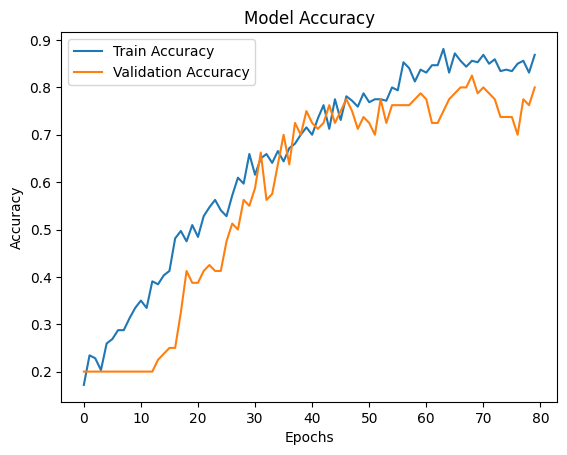

In [ ]:
# Evaluate model performance on the test set
test_loss, test_accuracy = bilstm_model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")

# Plot training accuracy and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


#confusion matrix

In [ ]:
lstm_model = model
gru_model = gru_model
bilstm_model = bilstm_model

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


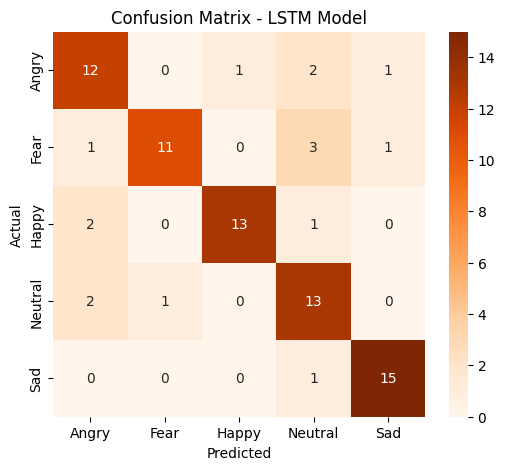

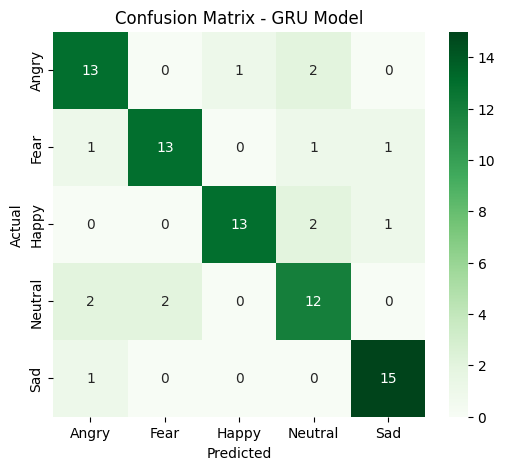

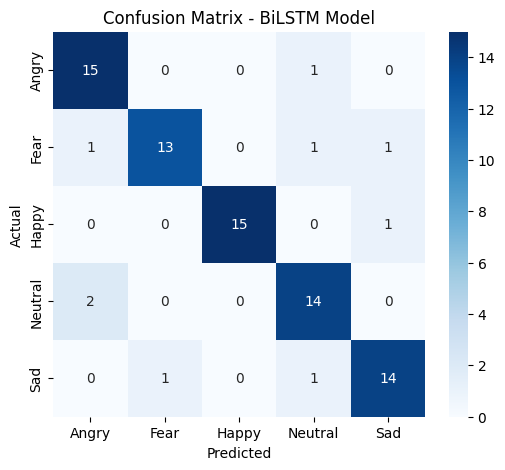

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix with a specific colormap
def plot_confusion_matrix(y_true, y_pred, model_name, cmap):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Angry', 'Fear', 'Happy', 'Neutral', 'Sad'], yticklabels=['Angry', 'Fear', 'Happy', 'Neutral', 'Sad'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Get predictions for each model
y_pred_lstm = np.argmax(lstm_model.predict(X_test_reshaped), axis=1)
y_pred_gru = np.argmax(gru_model.predict(X_test_reshaped), axis=1)
y_pred_bilstm = np.argmax(bilstm_model.predict(X_test_reshaped), axis=1)

# Plot confusion matrices with different colormaps
plot_confusion_matrix(y_test, y_pred_lstm, "LSTM Model", cmap="Oranges")
plot_confusion_matrix(y_test, y_pred_gru, "GRU Model", cmap="Greens")
plot_confusion_matrix(y_test, y_pred_bilstm, "BiLSTM Model", cmap="Blues")


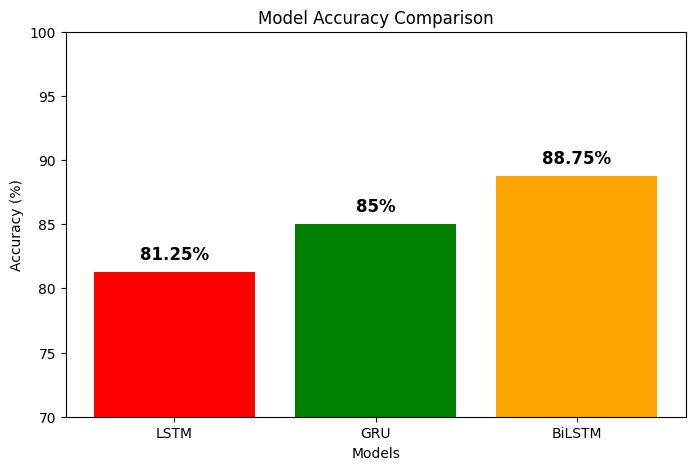

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["LSTM", "GRU", "BiLSTM"]
accuracies = [81.25, 85, 88.75]  # Replace with your actual accuracy values

# Plot the accuracy
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['red', 'green', 'orange'])

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(70, 100)  # Adjust the range if needed

# Display values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc}%", ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [ ]:
# Evaluate LSTM Model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

# Evaluate GRU Model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped, y_test)
print(f"GRU Model Accuracy: {gru_accuracy * 100:.2f}%")

# Evaluate BiLSTM Model
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_reshaped, y_test)
print(f"BiLSTM Model Accuracy: {bilstm_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7984 - loss: 0.8927
LSTM Model Accuracy: 80.00%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8227 - loss: 0.7781
GRU Model Accuracy: 82.50%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8930 - loss: 0.8034
BiLSTM Model Accuracy: 88.75%


In [ ]:
# Save LSTM model
lstm_model.save("lstm_model.h5")

# Save GRU model
gru_model.save("gru_model.h5")

# Save BiLSTM model
bilstm_model.save("bilstm_model.h5")


In [ ]:
from tensorflow.keras.models import load_model



# Load BiLSTM model
loaded_bilstm_model = load_model("bilstm_model.h5")


In [ ]:
import numpy as np

# Select a sample from the test set
sample_index = 0  # Change this index to test different samples
sample_input = X_test_reshaped[sample_index].reshape(1, 1, 182)  # Reshape for model input

# Make a prediction
predicted_probs = bilstm_model.predict(sample_input)
predicted_class = np.argmax(predicted_probs)  # Get the class with the highest probability

# Define emotion labels
emotion_labels = {0: "Angry", 1: "Fear", 2: "Happy", 3: "Neutral", 4: "Sad"}

# Print results
print(f"Predicted Emotion: {emotion_labels[predicted_class]}")
print(f"Prediction Probabilities: {predicted_probs}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Emotion: Fear
Prediction Probabilities: [[1.4947125e-04 9.9903190e-01 4.3675216e-04 1.7268068e-05 3.6460633e-04]]
